Epoch 1/2
2500/2500 [==============================] - 5s 2ms/step - loss: 155.5492
Epoch 2/2
3/3 [==============================] - 0s 4ms/step


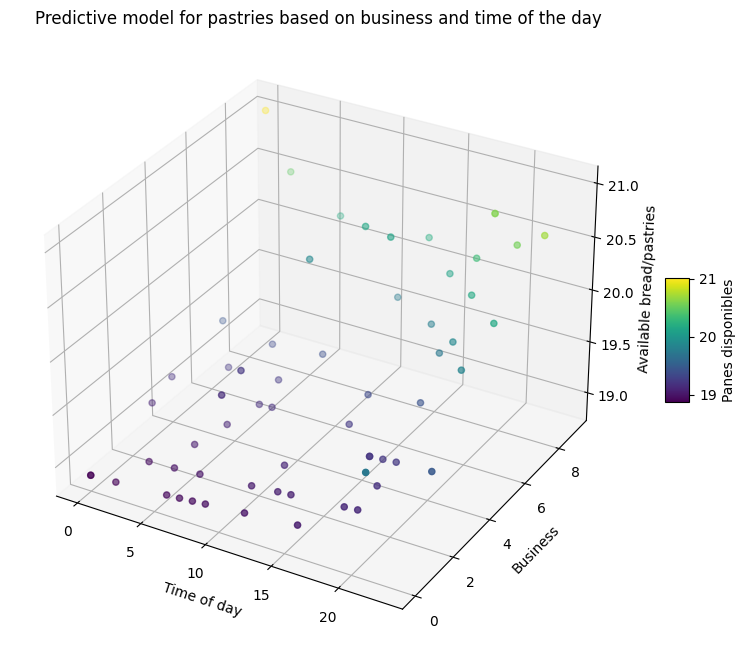

In [ ]:
import numpy as np
import pandas as pd

num_samples = 100000  # Número de muestras a generar
np.random.seed(42)  # Para reproducibilidad

# Generar datos como enteros
horas = np.random.randint(0, 24, size=num_samples)
negocios = np.random.randint(0, 10, size=num_samples)
fechas = np.random.randint(0, 365, size=num_samples)
panes_disponibles = np.random.randint(0, 40, size=num_samples)

# Crear DataFrame
data = pd.DataFrame({
    'hora': horas,
    'negocio': negocios,
    'fecha': fechas,
    'panes_disponibles': panes_disponibles
})

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1]-1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
x_train = train_data[['hora', 'negocio', 'fecha']]
y_train = train_data['panes_disponibles']
model.fit(x_train, y_train, epochs=2, batch_size=32)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar un día aleatorio y hacer predicciones
day_selected = np.random.choice(test_data['fecha'].unique())
test_subset = test_data[test_data['fecha'] == day_selected]

x_test = test_subset[['hora', 'negocio', 'fecha']]
predictions = model.predict(x_test)

# Crear gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar
hours = x_test['hora']
businesses = x_test['negocio']
available_breads = predictions.flatten()

scat = ax.scatter(hours, businesses, available_breads, c=available_breads, cmap='viridis')
ax.set_xlabel('Time of day')
ax.set_ylabel('Business')
ax.set_zlabel('Available bread/pastries')
ax.set_title('Predictive model for pastries based on business and time of the day')

cbar = fig.colorbar(scat, shrink=1, aspect=5)
cbar.set_label('Panes disponibles')

plt.show()